## * 한글 폰트 설치 후 진행
> 1) 한글 폰트 설치
>    * 설치 후 '런타임 다시 시작'

In [ ]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-driver

In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img



mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

# - **이소영**

---



# * **의무교육 기관 수 & 학생 수**  -> 페교 위기!

*   1) 초등학교 수 & 초등학생 수
*   2) 중학교 수 & 중학생 수






# 초등학교 수 & 초등학생 수에 따른 폐교 위기 


In [ ]:
# 초등학교 수 & 초등학생 수에 따른 폐교 위기 추측 
# (2000-2020, 20년간)
#

#파일 읽기
school = pd.read_csv('school.csv', encoding='cp949')
student = pd.read_csv('student.csv', encoding='cp949')

#초등학교 수
school.drop(columns = ['국립', '공립', '사립'], inplace= True)
school.rename(columns = {school.columns[1]: '초등학교 수'}, inplace = True)
school_T = school.T


In [ ]:
#초등학생 수


student.drop(columns = ['국립', '공립', '사립'], inplace= True)
student.rename(columns = {student.columns[1]: '초등학생 수'}, inplace = True)
student_T = student.T
student_T 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
연도,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
초등학생 수,"4,941,345","5,165,490","5,382,500","5,548,577","5,622,816","5,749,301","5,807,448","5,775,880","5,692,285","5,618,768","5,599,074","5,503,737","5,514,417","5,604,365","5,640,712","5,658,002","5,586,494","5,465,248","5,257,164","5,040,958","4,856,752","4,798,323","4,771,722","4,819,857","4,894,261","4,868,520","4,758,505","4,560,128","4,336,252","4,099,395","3,905,163","3,800,540","3,783,986","3,834,561","3,935,537","4,019,991","4,089,429","4,138,366","4,175,626","4,116,195","4,022,801","3,925,043","3,829,998","3,672,207","3,474,395","3,299,094","3,132,477","2,951,995","2,784,000","2,728,509","2,714,610","2,672,843","2,674,227","2,711,385","2,747,219","2,693,716"


In [ ]:
#초등학교 수 & 초등학생 수 합침

sc_st_total = pd.merge(school, student, on = '연도')
sc_st_total_T = sc_st_total.T

In [ ]:
#데이터 전처리(2000년~2020년 간)

for i in range(0,56):
    sc_st_total_T.rename(columns = {sc_st_total_T.columns[i] : 1965+i}, inplace= True)

sc_st_total_T.drop(index = '연도', inplace= True)
sc_st_total_T.drop(columns = range(1965,2000), inplace= True)


#문자열 데이터 -> 숫자형 변환

# ',' 제거
for i in range(0,21):
    sc_total_T_int = sc_st_total_T.loc['초등학교 수'][2000+i].replace(',',"")
    int(sc_total_T_int)
    sc_st_total_T.loc['초등학교 수'][2000+i]= sc_total_T_int
    st_total_T_int = sc_st_total_T.loc['초등학생 수'][2000+i].replace(',',"")
    int(st_total_T_int)
    sc_st_total_T.loc['초등학생 수'][2000+i]= st_total_T_int


#숫자형으로 변환
sc_st_total_T = sc_st_total_T.apply(pd.to_numeric)

sc_st_total_T.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 초등학교 수 to 초등학생 수
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2000    2 non-null      int64
 1   2001    2 non-null      int64
 2   2002    2 non-null      int64
 3   2003    2 non-null      int64
 4   2004    2 non-null      int64
 5   2005    2 non-null      int64
 6   2006    2 non-null      int64
 7   2007    2 non-null      int64
 8   2008    2 non-null      int64
 9   2009    2 non-null      int64
 10  2010    2 non-null      int64
 11  2011    2 non-null      int64
 12  2012    2 non-null      int64
 13  2013    2 non-null      int64
 14  2014    2 non-null      int64
 15  2015    2 non-null      int64
 16  2016    2 non-null      int64
 17  2017    2 non-null      int64
 18  2018    2 non-null      int64
 19  2019    2 non-null      int64
 20  2020    2 non-null      int64
dtypes: int64(21)
memory usage: 432.0+ bytes


In [ ]:

get_ipython().run_line_magic('matplotlib', 'inline')


#회귀계수 계산

np.set_printoptions(suppress = True)

sc_x = sc_st_total_T.columns
sc_y = sc_st_total_T.loc['초등학교 수']
sc_fp = np.polyfit( sc_x,sc_y,1)
sc_f = np.poly1d(sc_fp)
print(sc_f, '\n')
sc_fx = sc_st_total_T.columns
print(sc_fx)

st_x = sc_st_total_T.columns
st_y = sc_st_total_T.loc['초등학생 수']
st_fp = np.polyfit( st_x,st_y,1)
st_f = np.poly1d(st_fp)
print(st_f, '\n')
st_fx = sc_st_total_T.columns
print(st_fx)



 
40.01 x - 7.463e+04 

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')
 
-9.373e+04 x + 1.918e+08 

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')


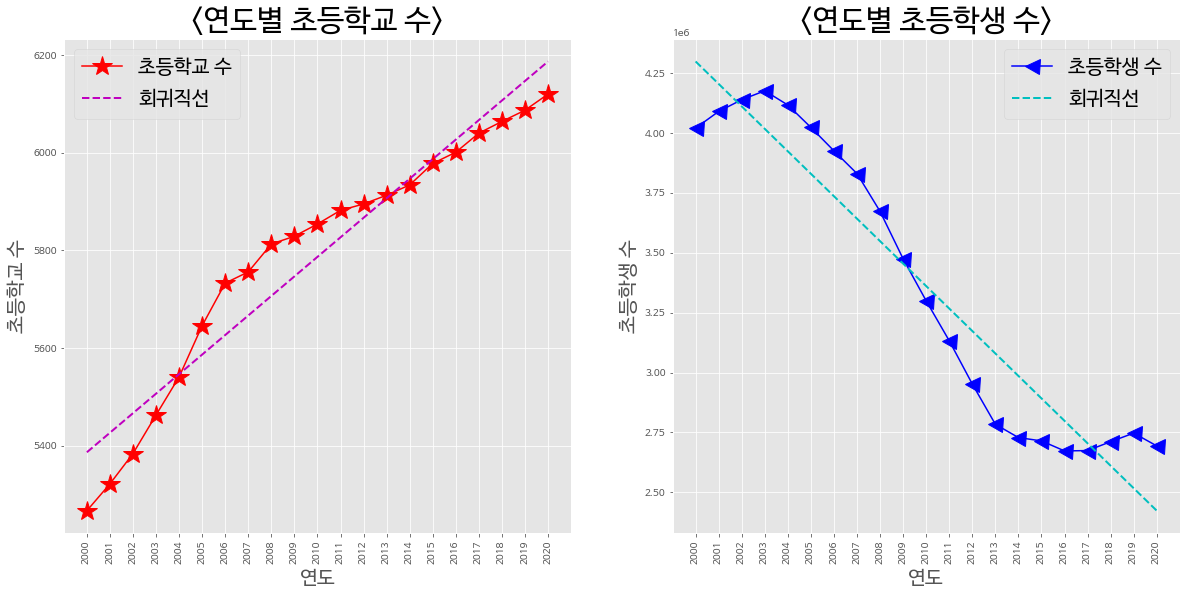

In [ ]:
#최종 시각화(회귀직선 포함)
# 색 b g r c(청녹) m(자홍) y k w

get_ipython().run_line_magic('matplotlib', 'inline')


plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(sc_x,sc_y,'*-r', markersize = 20)
plt.plot(sc_fx, sc_f(sc_fx), ls = 'dashed', lw = 2, color = 'm')
plt.xlabel('연도',fontsize = 20)
plt.ylabel('초등학교 수',fontsize = 20)
plt.title('<연도별 초등학교 수>',fontsize = 30)
plt.grid(True)
plt.xticks(sc_st_total_T.columns, rotation = 'vertical')
plt.legend(['초등학교 수','회귀직선'],loc = 'best',fontsize = 20)

plt.subplot(2,2,2)
plt.plot(st_x,st_y,'<-b', markersize = 15)
plt.scatter( st_x,st_y,s = 20)
plt.plot(st_fx, st_f(st_fx), ls = 'dashed', lw = 2, color = 'c')
plt.xlabel('연도',fontsize = 20)
plt.ylabel('초등학생 수',fontsize = 20)
plt.title('<연도별 초등학생 수>',fontsize = 30)
plt.grid(True)
plt.xticks(sc_st_total_T.columns,rotation = 'vertical')
plt.legend(['초등학생 수','회귀직선'],loc = 'best',fontsize = 20)
plt.show()


In [ ]:
# 초등학교 수 기울기 계산 ( 2000~2010 <-> 2010~2020 )

s_c_g1 = (sc_st_total_T.loc['초등학교 수'][2010] - sc_st_total_T.loc['초등학교 수'][2000]) / (2010-2000)
s_c_g2 = (sc_st_total_T.loc['초등학교 수'][2020] - sc_st_total_T.loc['초등학교 수'][2010]) / (2020-2010)

# 10년 간의 대략적인 기울기 
print("2000년~2010년 동안의 기울기: {0}, 2010년~2020년 동안의 기울기: {1}" .format(s_c_g1, s_c_g2))
print("따라서 2010년~2020년 동안의 초등학교 수의 증가가 더디다! ")

2000년~2010년 동안의 기울기: 58.7, 2010년~2020년 동안의 기울기: 26.6
따라서 2010년~2020년 동안의 초등학교 수의 증가가 더디다! 


# 중학교 수 & 중학생 수에 따른 폐교 위기

In [ ]:
# 중학교 수 & 중학생 수에 따른 폐교 위기 추측 
# (2000-2020, 20년간)
#

#파일 읽기
middle_school = pd.read_csv('middle_school.csv', encoding='cp949')
middle_student = pd.read_csv('middle_student.csv', encoding='cp949')

#중학교
middle_school.drop(columns = ['국립', '공립', '사립'], inplace= True)
middle_school.rename(columns = {middle_school.columns[1]: '중학교 수'}, inplace = True)
middle_school_T = middle_school.T
middle_school_T 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
연도,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
중학교 수,"1,208","1,251","1,314","1,420","1,463","1,608","1,794","1,866","1,916","1,935","1,967","1,977","1,987","2,012","2,056","2,121","2,174","2,213","2,254","2,325","2,371","2,412","2,424","2,429","2,450","2,474","2,498","2,539","2,590","2,645","2,683","2,705","2,720","2,736","2,741","2,731","2,770","2,809","2,850","2,888","2,935","2,999","3,032","3,077","3,106","3,130","3,153","3,162","3,173","3,186","3,204","3,209","3,213","3,214","3,214","3,223"


In [ ]:
#중학생
middle_student.drop(columns = ['국립', '공립', '사립'], inplace= True)
middle_student.rename(columns = {middle_student.columns[1]: '중학생 수'}, inplace = True)
middle_student_T = middle_student.T

In [ ]:
#중학교 수 & 중학생 수 합침

m_sc_st_total = pd.merge(middle_school, middle_student, on = '연도')
m_sc_st_total_T = m_sc_st_total.T
m_sc_st_total_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
연도,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
중학교 수,"1,208","1,251","1,314","1,420","1,463","1,608","1,794","1,866","1,916","1,935","1,967","1,977","1,987","2,012","2,056","2,121","2,174","2,213","2,254","2,325","2,371","2,412","2,424","2,429","2,450","2,474","2,498","2,539","2,590","2,645","2,683","2,705","2,720","2,736","2,741","2,731","2,770","2,809","2,850","2,888","2,935","2,999","3,032","3,077","3,106","3,130","3,153","3,162","3,173","3,186","3,204","3,209","3,213","3,214","3,214","3,223"
중학생 수,"751,341","821,997","911,938","1,013,494","1,147,408","1,318,808","1,529,541","1,686,363","1,832,092","1,929,975","2,026,823","2,116,635","2,195,770","2,298,124","2,394,620","2,471,997","2,573,945","2,603,433","2,672,307","2,735,625","2,782,173","2,765,629","2,657,730","2,523,515","2,371,215","2,275,751","2,232,330","2,336,284","2,410,874","2,508,657","2,481,848","2,379,983","2,180,283","2,011,468","1,896,956","1,860,539","1,831,152","1,841,030","1,854,641","1,933,543","2,010,704","2,075,311","2,063,159","2,038,611","2,006,972","1,974,798","1,910,572","1,849,094","1,804,189","1,717,911","1,585,951","1,457,490","1,381,334","1,334,288","1,294,559","1,315,846"


In [ ]:

for i in range(0,56):
    m_sc_st_total_T.rename(columns = {m_sc_st_total_T.columns[i] : 1965+i}, inplace= True)

m_sc_st_total_T.drop(index = '연도', inplace= True)
m_sc_st_total_T.drop(columns = range(1965,2000), inplace= True)


m_sc_st_total_T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
중학교 수,"2,731","2,770","2,809","2,850","2,888","2,935","2,999","3,032","3,077","3,106","3,130","3,153","3,162","3,173","3,186","3,204","3,209","3,213","3,214","3,214","3,223"
중학생 수,"1,860,539","1,831,152","1,841,030","1,854,641","1,933,543","2,010,704","2,075,311","2,063,159","2,038,611","2,006,972","1,974,798","1,910,572","1,849,094","1,804,189","1,717,911","1,585,951","1,457,490","1,381,334","1,334,288","1,294,559","1,315,846"


In [ ]:
#문자열 데이터 -> 숫자형 변환

# ',' 제거
for i in range(0,21):
    m_sc_total_T_int = m_sc_st_total_T.loc['중학교 수'][2000+i].replace(',',"")
    m_sc_st_total_T.loc['중학교 수'][2000+i]= m_sc_total_T_int
    m_st_total_T_int = m_sc_st_total_T.loc['중학생 수'][2000+i].replace(',',"")
    int(m_st_total_T_int)
    m_sc_st_total_T.loc['중학생 수'][2000+i]= m_st_total_T_int


#숫자형으로 변환

m_sc_st_total_T = m_sc_st_total_T.apply(pd.to_numeric)
m_sc_st_total_T.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 중학교 수 to 중학생 수
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2000    2 non-null      int64
 1   2001    2 non-null      int64
 2   2002    2 non-null      int64
 3   2003    2 non-null      int64
 4   2004    2 non-null      int64
 5   2005    2 non-null      int64
 6   2006    2 non-null      int64
 7   2007    2 non-null      int64
 8   2008    2 non-null      int64
 9   2009    2 non-null      int64
 10  2010    2 non-null      int64
 11  2011    2 non-null      int64
 12  2012    2 non-null      int64
 13  2013    2 non-null      int64
 14  2014    2 non-null      int64
 15  2015    2 non-null      int64
 16  2016    2 non-null      int64
 17  2017    2 non-null      int64
 18  2018    2 non-null      int64
 19  2019    2 non-null      int64
 20  2020    2 non-null      int64
dtypes: int64(21)
memory usage: 432.0+ bytes


In [ ]:

get_ipython().run_line_magic('matplotlib', 'inline')

#회귀계수 계산

np.set_printoptions(suppress = True)

m_sc_x = m_sc_st_total_T.columns
m_sc_y = m_sc_st_total_T.loc['중학교 수']
m_sc_fp = np.polyfit(m_sc_x, m_sc_y,1)
m_sc_f = np.poly1d(m_sc_fp)
print(m_sc_f, '\n')
m_sc_fx = m_sc_st_total_T.columns
print(m_sc_fx)


m_st_x = m_sc_st_total_T.columns
m_st_y = m_sc_st_total_T.loc['중학생 수']
m_st_fp = np.polyfit(m_st_x, m_st_y,1)
m_st_f = np.poly1d(m_st_fp)
print(m_st_f, '\n')
m_st_fx = m_sc_st_total_T.columns
print(m_st_fx)


 
25.14 x - 4.747e+04 

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')
 
-3.286e+04 x + 6.783e+07 

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')


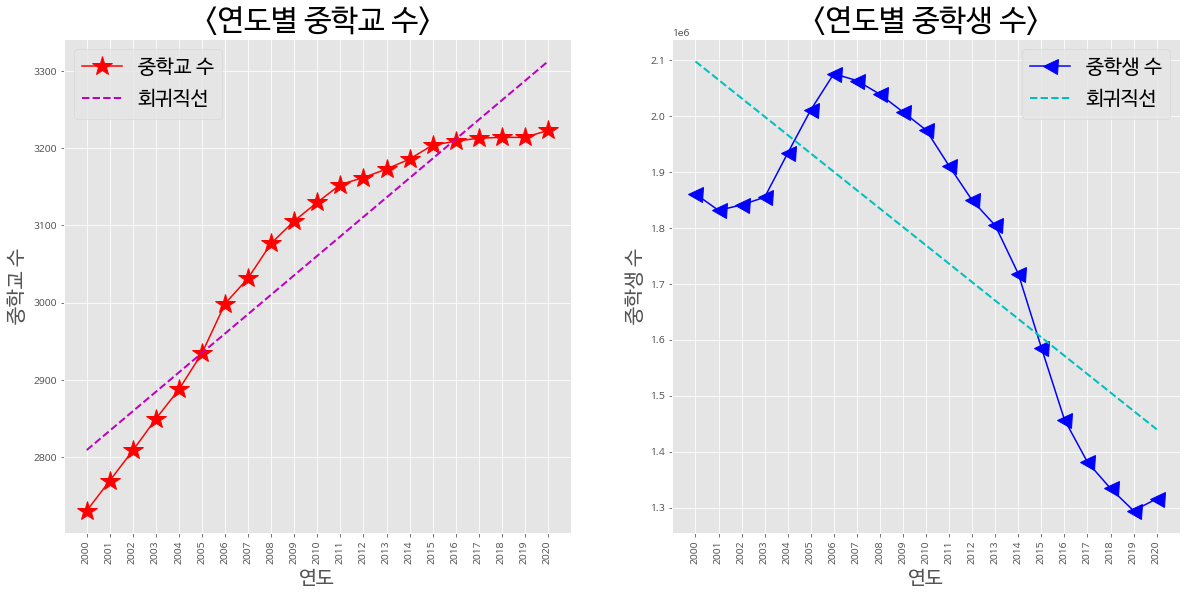

In [ ]:

#최종 시각화(회귀직선 포함)
# 색 b g r c(청녹) m(자홍) y k w

get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(m_sc_x, m_sc_y,'*-r', markersize = 20)
plt.plot(m_sc_fx, m_sc_f(m_sc_fx), ls = 'dashed', lw = 2, color = 'm')
plt.xlabel('연도',fontsize = 20)
plt.ylabel('중학교 수',fontsize = 20)
plt.title('<연도별 중학교 수>',fontsize = 30)
plt.grid(True)
plt.xticks(m_sc_st_total_T.columns, rotation = 'vertical')
plt.legend(['중학교 수','회귀직선'],loc = 'best',fontsize = 20)

plt.subplot(2,2,2)
plt.plot(m_st_x, m_st_y,'<-b', markersize = 15)
plt.plot(m_st_fx, m_st_f(m_st_fx), ls = 'dashed', lw = 2, color = 'c')
plt.xlabel('연도',fontsize = 20)
plt.ylabel('중학생 수',fontsize = 20)
plt.title('<연도별 중학생 수>',fontsize = 30)
plt.grid(True)
plt.xticks(m_sc_st_total_T.columns,rotation = 'vertical')
plt.legend(['중학생 수','회귀직선'],loc = 'best',fontsize = 20)
plt.show()

In [ ]:
# 중학교 수 기울기 계산 ( 2000~2010 <-> 2010~2020 )

m_s_c_g1 = (m_sc_st_total_T.loc['중학교 수'][2010] - m_sc_st_total_T.loc['중학교 수'][2000]) / (2010-2000)
m_s_c_g2 = (m_sc_st_total_T.loc['중학교 수'][2020] - m_sc_st_total_T.loc['중학교 수'][2010]) / (2020-2010)

# 10년 간의 대략적인 기울기 
print("2000년~2010년 동안의 기울기: {0}, 2010년~2020년 동안의 기울기: {1}" .format(m_s_c_g1, m_s_c_g2))
print("따라서 2010년~2020년 동안의 중학교 수의 증가가 더디다! ")

2000년~2010년 동안의 기울기: 39.9, 2010년~2020년 동안의 기울기: 9.3
따라서 2010년~2020년 동안의 중학교 수의 증가가 더디다! 


#폐교현황 2008~2021 (2010, 2018 제외)




In [ ]:
## 교육부 통계 자료

close_down_school = pd.read_excel('close_down_school.xlsx')
close_down_school


,Unnamed: 0,2008,2009,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021
0,폐교,3246,3349,3438,3509,3544,3595,3627,3678,3726,3784,3834,3855


In [ ]:
close_down_school.rename(index = {close_down_school.index[0]: '폐교 수'}, inplace = True)
close_down_school.drop(columns= 'Unnamed: 0', inplace= True)
close_down_school.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 폐교 수 to 폐교 수
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2008    1 non-null      int64
 1   2009    1 non-null      int64
 2   2011    1 non-null      int64
 3   2012    1 non-null      int64
 4   2013    1 non-null      int64
 5   2014    1 non-null      int64
 6   2015    1 non-null      int64
 7   2016    1 non-null      int64
 8   2017    1 non-null      int64
 9   2019    1 non-null      int64
 10  2020    1 non-null      int64
 11  2021    1 non-null      int64
dtypes: int64(12)
memory usage: 104.0+ bytes


In [ ]:
close_down_school

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021
폐교 수,3246,3349,3438,3509,3544,3595,3627,3678,3726,3784,3834,3855


In [ ]:
close_down_school_n_data = []
for i in range(0,11):
  close_down_school_n = close_down_school.loc['폐교 수'][close_down_school.columns[i+1]] - close_down_school.loc['폐교 수'][close_down_school.columns[i]]
  close_down_school_n_data.append(close_down_school_n)

close_down_school_n_data

[103, 89, 71, 35, 51, 32, 51, 48, 58, 50, 21]

In [ ]:

close_down_school.loc['폐교 증가량'] = [np.nan, 103, 89, 71, 35, 51, 32, 51, 48, 58, 50, 21]
close_down_school

,2008,2009,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021
폐교 수,3246.0,3349.0,3438.0,3509.0,3544.0,3595.0,3627.0,3678.0,3726.0,3784.0,3834.0,3855.0
폐교 증가량,NaN,103.0,89.0,71.0,35.0,51.0,32.0,51.0,48.0,58.0,50.0,21.0


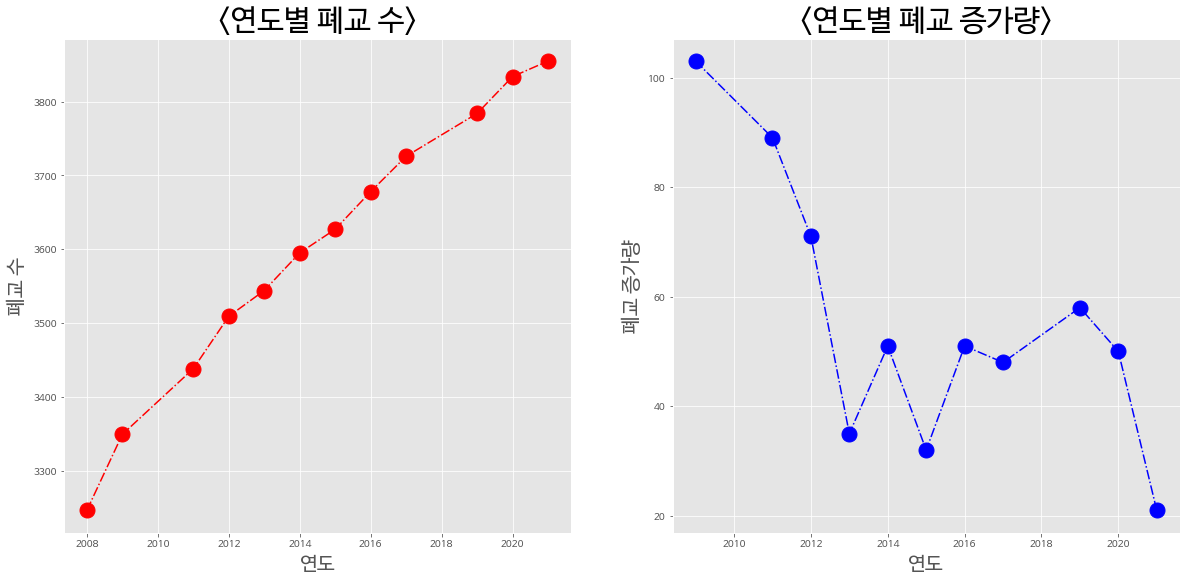

In [ ]:
# 연도별 폐고 누적 수 & 폐교 수 시각화
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
cs_x= close_down_school.columns
cs_y = close_down_school.loc['폐교 수']
plt.plot(cs_x, cs_y, 'o-.r', markersize = 15)
plt.grid(True)
plt.xlabel('연도',fontsize = 20)
plt.ylabel('폐교 수',fontsize = 20)
plt.title('<연도별 폐교 수>',fontsize = 30)


plt.subplot(2,2,2)
cs_n_x= close_down_school.columns
cs_n_y = close_down_school.loc['폐교 증가량']
plt.plot(cs_n_x, cs_n_y, 'o-.b', markersize = 15)
plt.grid(True)
plt.xlabel('연도',fontsize = 20)
plt.ylabel('폐교 증가량',fontsize = 20)
plt.title('<연도별 폐교 증가량>',fontsize = 30)
plt.show()

# * 출생아 수 & 사망자 수 -> 인구 감소 심각성!

## 1) 출생아 수 & 사망자 수 

In [ ]:

# 출생아 수 & 사망자 수에 따른 인구 감소율 추측 
# (2000-2020, 20년간)
#
#

population = pd.read_csv('korea_population.csv', encoding='cp949')


In [ ]:

population.drop(index = range(3,190), inplace = True)
population.drop(population.index[1], inplace = True)
population.drop(columns = ['행정구역별', '항목'], inplace = True)
population.index = ['출생아 수', '사망자 수']
 
population


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,640089,559934,496911,495036,476958,438707,451759,496822,465892,444849,470171,471265,484550.0,436455.0,435435.0,438420.0,406243.0,357771,326822.0,302676,272337
사망자 수,248740,243813,247524,246463,246220,245874,244162,246482,246113,246942,255405,257396,267221.0,266257.0,267692.0,275895.0,280827.0,285534,298820.0,295110,-


In [ ]:
population.info()  # 데이터 숫자형 아님!

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 출생아 수 to 사망자 수
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    2 non-null      object 
 1   2001    2 non-null      object 
 2   2002    2 non-null      object 
 3   2003    2 non-null      object 
 4   2004    2 non-null      object 
 5   2005    2 non-null      object 
 6   2006    2 non-null      object 
 7   2007    2 non-null      object 
 8   2008    2 non-null      object 
 9   2009    2 non-null      object 
 10  2010    2 non-null      object 
 11  2011    2 non-null      object 
 12  2012    2 non-null      float64
 13  2013    2 non-null      float64
 14  2014    2 non-null      float64
 15  2015    2 non-null      float64
 16  2016    2 non-null      float64
 17  2017    2 non-null      object 
 18  2018    2 non-null      float64
 19  2019    2 non-null      object 
 20  2020    2 non-null      object 
dtypes: float64(6), object(15)
memory usage: 

In [ ]:
# 문자열 데이터 -> 숫자형 변환

population = population.replace('-',305100)
population = population.apply(pd.to_numeric)
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 출생아 수 to 사망자 수
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    2 non-null      int64  
 1   2001    2 non-null      int64  
 2   2002    2 non-null      int64  
 3   2003    2 non-null      int64  
 4   2004    2 non-null      int64  
 5   2005    2 non-null      int64  
 6   2006    2 non-null      int64  
 7   2007    2 non-null      int64  
 8   2008    2 non-null      int64  
 9   2009    2 non-null      int64  
 10  2010    2 non-null      int64  
 11  2011    2 non-null      int64  
 12  2012    2 non-null      float64
 13  2013    2 non-null      float64
 14  2014    2 non-null      float64
 15  2015    2 non-null      float64
 16  2016    2 non-null      float64
 17  2017    2 non-null      int64  
 18  2018    2 non-null      float64
 19  2019    2 non-null      int64  
 20  2020    2 non-null      int64  
dtypes: float64(6), int64(15)
memory usage: 3

## 2) 출생아 수 - 사망자 수 =  인구 증가(감소)량

In [ ]:
# 출생아 수 - 사망자 수 = 차이 =====> 인구 증가량
d_b_df= population.loc['출생아 수']- population.loc['사망자 수']

population = population.append(d_b_df,ignore_index=True)
population.index = ['출생아 수', '사망자 수','인구 증가량']


## 3) 인구 감소율


In [ ]:

## 증가율(감소율) 추가
##
##
ratio_data = [np.nan,]
for i in range(0,20):
    ratio = (population.loc['인구 증가량'][i+1]-population.loc['인구 증가량'][i])*100/population.loc['인구 증가량'][i]
    ratio_data.append(ratio)

    
Ratio = pd.DataFrame(ratio_data)

population.loc['감소율'] = ratio_data

population


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,640089.0,559934.00000,496911.000000,495036.0000,476958.000000,438707.000000,451759.000000,496822.000000,465892.000000,444849.000000,470171.000000,471265.000000,484550.000000,436455.000000,435435.000000,438420.000000,406243.000000,357771.000000,326822.000000,302676.000000,272337.000000
사망자 수,248740.0,243813.00000,247524.000000,246463.0000,246220.000000,245874.000000,244162.000000,246482.000000,246113.000000,246942.000000,255405.000000,257396.000000,267221.000000,266257.000000,267692.000000,275895.000000,280827.000000,285534.000000,298820.000000,295110.000000,305100.000000
인구 증가량,391349.0,316121.00000,249387.000000,248573.0000,230738.000000,192833.000000,207597.000000,250340.000000,219779.000000,197907.000000,214766.000000,213869.000000,217329.000000,170198.000000,167743.000000,162525.000000,125416.000000,72237.000000,28002.000000,7566.000000,-32763.000000
감소율,NaN,-19.22274,-21.110271,-0.3264,-7.174955,-16.427723,7.656366,20.589411,-12.207797,-9.951815,8.518648,-0.417664,1.617813,-21.686475,-1.442438,-3.110711,-22.832795,-42.402086,-61.235932,-72.980501,-533.029342


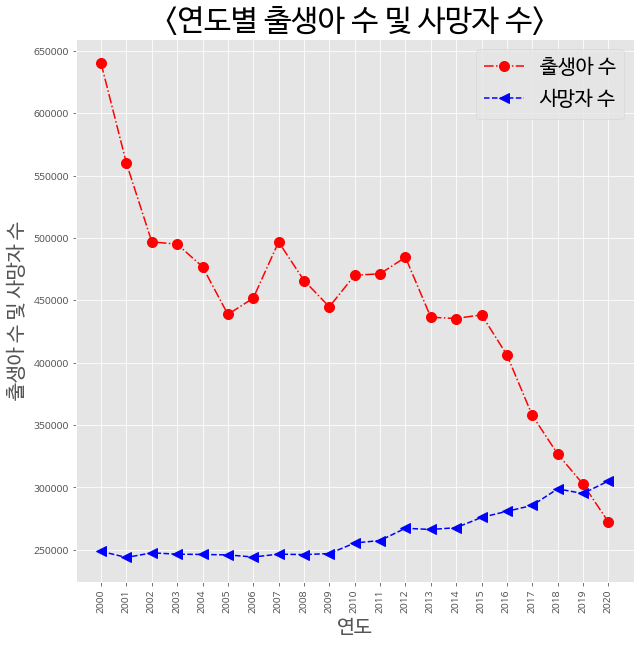

In [ ]:
# 연도별 출생아 수 및 사망자 수 -> 시각화
get_ipython().run_line_magic('matplotlib', 'inline')


plt.figure(figsize = (10,10))
plt.style.use('ggplot')
b_x= population.columns
b_y = population.loc['출생아 수']
d_x =  population.columns
d_y = population.loc['사망자 수']
plt.plot(b_x, b_y, 'o-.r', d_x, d_y, '<--b', markersize = 10)
plt.grid(True)
plt.xlabel('연도',fontsize = 20)
plt.ylabel('출생아 수 및 사망자 수',fontsize = 20)
plt.title('<연도별 출생아 수 및 사망자 수>',fontsize = 30)
plt.legend(['출생아 수','사망자 수'],fontsize = 20 , loc = 'best')
plt.xticks(rotation = 'vertical')
#plt.text(2,2, '출생아 수')
plt.show()


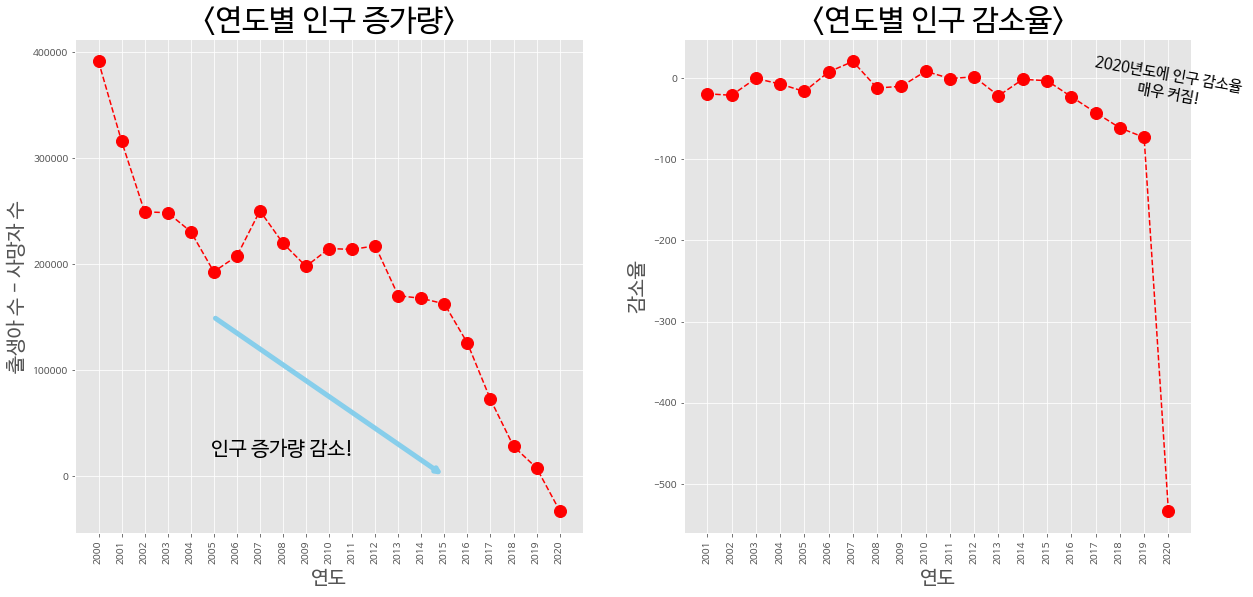

In [ ]:
# '출생아 수 - 사망자 수'= 인구 증가량 -> 시각화 

get_ipython().run_line_magic('matplotlib', 'inline')



plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
b_d_x = population.columns
b_d_y = population.loc['인구 증가량']
plt.plot(b_d_x, b_d_y, 'o--r', markersize = 12)
plt.grid(True)
plt.xlabel('연도', fontsize = 20)
plt.ylabel('출생아 수 - 사망자 수', fontsize = 20)
plt.title('<연도별 인구 증가량>', fontsize = 30)
plt.xticks(rotation = 'vertical')
plt.annotate('', xy= (15,2), # 끝
             xytext= (5,150000), # 시작
             xycoords = 'data', 
             arrowprops = dict(arrowstyle='->', color = 'skyblue', lw = 5) )
plt.annotate('인구 증가량 감소!', xy= (8,20000), rotation= 0, va = 'baseline', 
             ha = 'center', fontsize = 20 )


# 연도별 전년도 대비 인구 감소율 -> 시각화 

plt.subplot(2,2,2)
r_x = population.columns
r_y = population.loc['감소율']
plt.plot(r_x, r_y, 'o--r', markersize = 12)
plt.grid(True)
plt.xlabel('연도',fontsize = 20)
plt.ylabel('감소율',fontsize = 20)
plt.title('<연도별 인구 감소율>', fontsize = 30)
plt.xticks(rotation = 'vertical')
plt.annotate('2020년도에 인구 감소율 \n 매우 커짐!', xy= (20,-40), rotation= -10, va = 'baseline', 
             ha = 'center', fontsize = 15)
plt.show()


# - **김승연**

---


## 1. Data Processing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

> 1) Colab 파일 업로드
>  * 서울시 구,연령,연도별 출산율(17~20년).xls

In [ ]:
!ls -l

total 788
-rw-r--r-- 1 root root    630 Sep 14 00:26 '성,연령별 경제활동인구(10,20년).csv'
-rw-r--r-- 1 root root   6306 Sep 14 00:26 '전국 시군구,연령,연도별 출산율(17~20년).csv'
-rw-r--r-- 1 root root   1020 Sep 14 00:26 '연령,사유,연도별 경력단절여성(17~20년).csv'
-rw-r--r-- 1 root root   5848 Sep 14 00:26 '전국 월별 출생아수,혼인건수(17~21년).xlsx'
-rw-r--r-- 1 root root   1833 Sep 14 00:26 '전국 성, 30-39세 주민등록연앙인구(93~20년).csv'
-rw-r--r-- 1 root root  28777 Sep 14 00:41  age.png
-rw-r--r-- 1 root root  21724 Sep 14 00:41  birth.png
-rw-r--r-- 1 root root  26300 Sep 14 00:41  cause.png
-rw-r--r-- 1 root root  11832 Sep 14 00:26  close_down_school.xlsx
-rw-r--r-- 1 root root    492 Sep 14 00:26 '결혼에 대한 견해.csv'
-rw-r--r-- 1 root root  26900 Sep 14 00:41  fertility.png
-rw-r--r-- 1 root root  24031 Sep 14 00:26  korea_population.csv
-rw-r--r-- 1 root root  27256 Sep 14 00:41  marriage.png
-rw-r--r-- 1 root root   1568 Sep 14 00:26  middle_school.csv
-rw-r--r-- 1 root root   2690 Sep 14 00:26  middle_student.csv
-rw-r--r-- 1 root root  317

> 2) xls 파일 읽어오기

In [ ]:
import pandas as pd

age = pd.read_csv('전국 시군구,연령,연도별 출산율(17~20년).csv', sep=',', encoding='cp949')
age = age[age['시군구별']=='전국']
age.loc[age['항목']=='모의 연령별출산율:15-19세', '항목']='15-19세'
age = age.drop([0])
age.drop(columns = '시군구별', inplace = True)
age.set_index('항목', inplace=True)
age

,2017,2018,2019,2020
항목,,,,
15-19세,1.0,0.9,0.8,0.7
20-24세,9.6,8.2,7.1,6.2
25-29세,47.9,41.0,35.7,30.6
30-34세,97.7,91.4,86.2,78.9
35-39세,47.2,46.1,45.0,42.3
40-44세,6.0,6.4,7.0,7.1
45-49세,0.2,0.2,0.2,0.2


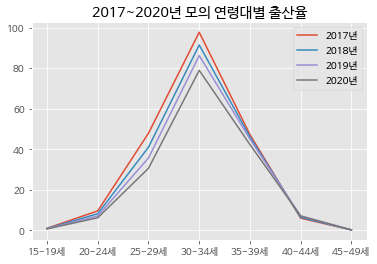

In [ ]:
import matplotlib.pyplot as plt
plt.plot(age)
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('2017~2020년 모의 연령대별 출산율')
plt.legend(['2017년','2018년','2019년','2020년'])

plt.savefig('age.png')

In [ ]:
import pandas as pd

number = pd.read_csv('전국 성, 30-39세 주민등록연앙인구(93~20년).csv', sep=',', encoding='cp949')
number = number[number['성별']=='여자']
number.drop(columns = '행정구역(시군구)별', inplace = True)
number.drop(columns = '성별', inplace = True)
number.set_index('연령별', inplace=True)
number.loc['30대 합계'] = number.sum()
number

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
연령별,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30 - 34세,2224019.0,2207804.5,2169386.5,2106594.0,2069191.5,2103134.5,2158213.0,2192942.0,2240687.0,2273266.0,2259295.0,2226341.0,2175108.5,2099829.0,2030318.5,1958242.0,1905463.0,1908572.0,1936026.0,1962312.5,1978039.0,1943363.5,1853636.0,1753196.0,1648854.0,1565827.5,1523573.0,1506687.5
35 - 39세,1801101.5,1914903.5,2016731.5,2112525.0,2183799.0,2199028.0,2181139.5,2145928.5,2086780.5,2049912.0,2082475.5,2136276.5,2169931.0,2217478.0,2253058.0,2246169.0,2220228.5,2171433.5,2096955.0,2027689.0,1955181.0,1902830.0,1906997.0,1935025.0,1961526.0,1977219.0,1941959.5,1852902.0
30대 합계,4025120.5,4122708.0,4186118.0,4219119.0,4252990.5,4302162.5,4339352.5,4338870.5,4327467.5,4323178.0,4341770.5,4362617.5,4345039.5,4317307.0,4283376.5,4204411.0,4125691.5,4080005.5,4032981.0,3990001.5,3933220.0,3846193.5,3760633.0,3688221.0,3610380.0,3543046.5,3465532.5,3359589.5


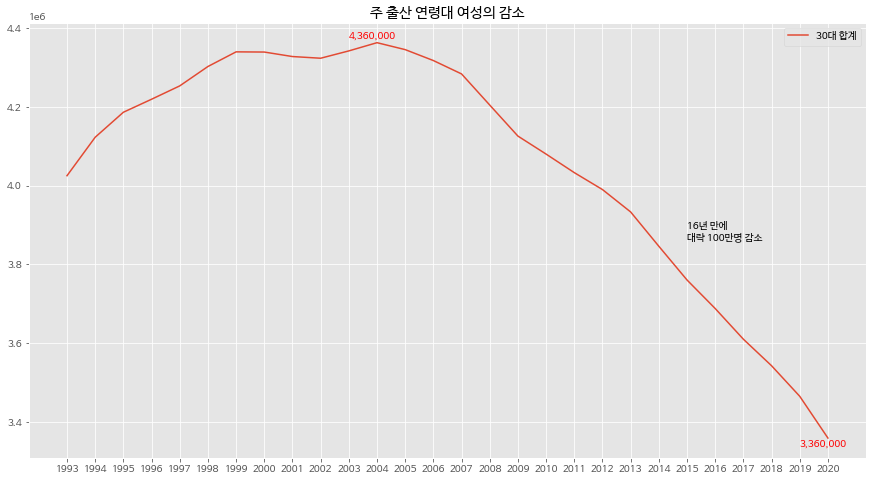

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(number.loc['30대 합계'])
plt.legend(['30대 합계'])
plt.title('주 출산 연령대 여성의 감소')
plt.text(x = 10, y = 4362617.5 + 10000, s ='4,360,000', color = 'r')
plt.text(x = 26, y = 3359589.5 - 20000, s = '3,360,000', color = 'r')
plt.text(x = (10+26)/2 +4, y = (4362617.5+3359589.5)/2, s = '대략 100만명 감소')
plt.text(x = (10+26)/2 +4, y = (4362617.5+3359589.5)/2 +30000, s = '16년 만에')

plt.savefig('number.png')

In [ ]:
import pandas as pd

corona = pd.read_excel('전국 월별 출생아수,혼인건수(17~21년).xlsx')
corona.drop(columns = '행정구역별(1)', inplace = True)
corona['시점'] = corona['시점'].str.replace(' p','')
corona.tail()

,시점,출생아수(명),혼인건수(건)
25,2021. 02),21461,14973
26,2021. 03),24054,16763
27,2021. 04),22820,15861
28,2021. 05),22052,16153
29,2021. 06),21526,16235


In [ ]:
from pandas.api.types import is_string_dtype

for col in corona.columns:
        if is_string_dtype(corona[col]):
            corona[col] = corona[col].str.replace('[^A-Za-z0-9-\s]+', '')

corona.tail()

,시점,출생아수(명),혼인건수(건)
25,2021 02,21461,14973
26,2021 03,24054,16763
27,2021 04,22820,15861
28,2021 05,22052,16153
29,2021 06,21526,16235


In [ ]:
corona['시점'] = corona['시점'].str.replace(' ','-')
corona['시점'] = pd.to_datetime(corona['시점'])
corona['연'] = corona['시점'].dt.year 
corona['월'] = corona['시점'].dt.month 
corona['혼인 감소율'] = corona['혼인건수(건)'].pct_change(periods=6)
corona

,시점,출생아수(명),혼인건수(건),연,월,혼인 감소율
0,2017-01-01,34834,23845,2017,1,NaN
1,2017-02-01,30499,21501,2017,2,NaN
2,2017-03-01,33196,23290,2017,3,NaN
3,2017-04-01,30337,20076,2017,4,NaN
4,2017-05-01,30303,26924,2017,5,NaN
5,2017-06-01,28892,22292,2017,6,NaN
6,2018-01-01,32198,24370,2018,1,0.022017
7,2018-02-01,27575,19008,2018,2,-0.115948
8,2018-03-01,29987,22773,2018,3,-0.022198
9,2018-04-01,27734,20610,2018,4,0.026599


In [ ]:
corona[corona['혼인 감소율'] < -0.1]

,시점,출생아수(명),혼인건수(건),연,월,혼인 감소율
7,2018-02-01,27575,19008,2018,2,-0.115948
12,2019-01-01,30271,21326,2019,1,-0.124908
14,2019-03-01,27049,19549,2019,3,-0.141571
17,2019-06-01,23992,17942,2019,6,-0.129452
21,2020-04-01,23299,15669,2020,4,-0.217567
22,2020-05-01,22847,18144,2020,5,-0.212671
24,2021-01-01,25003,16280,2021,1,-0.178566
25,2021-02-01,21461,14973,2021,2,-0.216196
26,2021-03-01,24054,16763,2021,3,-0.134053
28,2021-05-01,22052,16153,2021,5,-0.109733


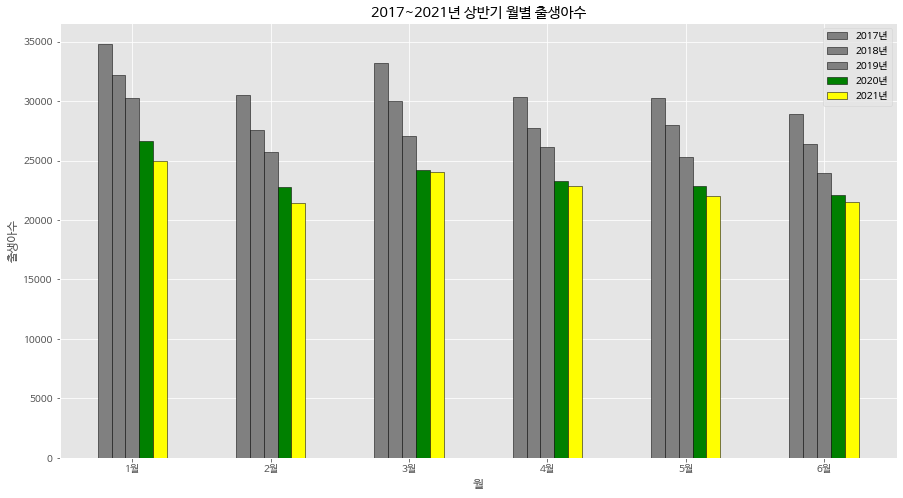

In [ ]:
import matplotlib.pyplot as plt
import numpy

label = ['1월','2월','3월','4월','5월','6월']
plt.figure()
plt.rcParams['figure.figsize'] = (20, 8)
x = numpy.arange(len(label))

plt.bar(x-0.2, corona[corona['연']==2017]['출생아수(명)'], label='2017년', width=0.1, color='grey', edgecolor="black")
plt.bar(x-0.1, corona[corona['연']==2018]['출생아수(명)'], label='2018년', width=0.1, color='grey', edgecolor="black")
plt.bar(x+0.0, corona[corona['연']==2019]['출생아수(명)'], label='2019년', width=0.1, color='grey', edgecolor="black")
plt.bar(x+0.1, corona[corona['연']==2020]['출생아수(명)'], label='2020년', width=0.1, color='green', edgecolor="black")
plt.bar(x+0.2, corona[corona['연']==2021]['출생아수(명)'], label='2021년', width=0.1, color='yellow', edgecolor="black")
plt.xticks(x, label)

plt.legend()
plt.xlabel('월')
plt.ylabel('출생아수')
plt.title('2017~2021년 상반기 월별 출생아수')

plt.savefig('birth.png')

plt.show()

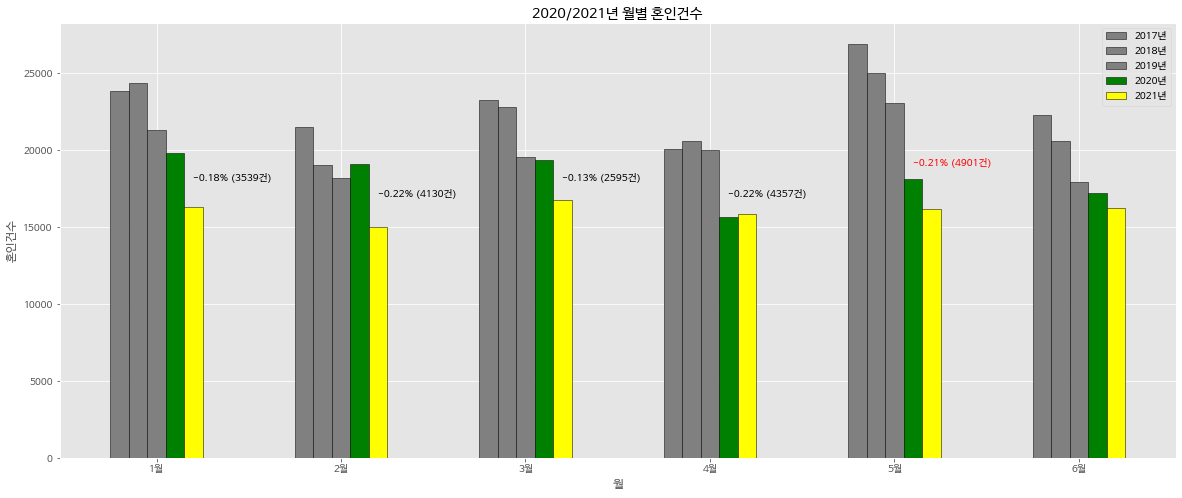

In [ ]:
import matplotlib.pyplot as plt
import numpy

label = ['1월','2월','3월','4월','5월','6월']
plt.figure()
plt.rcParams['figure.figsize'] = (13, 8)
x = numpy.arange(len(label))

plt.bar(x-0.2, corona[corona['연']==2017]['혼인건수(건)'], label='2017년', width=0.1, color='grey', edgecolor="black")
plt.bar(x-0.1, corona[corona['연']==2018]['혼인건수(건)'], label='2018년', width=0.1, color='grey', edgecolor="black")
plt.bar(x+0.0, corona[corona['연']==2019]['혼인건수(건)'], label='2019년', width=0.1, color='grey', edgecolor="black")
plt.bar(x+0.1, corona[corona['연']==2020]['혼인건수(건)'], label='2020년', width=0.1, color='green', edgecolor="black")
plt.bar(x+0.2, corona[corona['연']==2021]['혼인건수(건)'], label='2021년', width=0.1, color='yellow', edgecolor="black")
plt.xticks(x, label)

plt.legend()
plt.xlabel('월')
plt.ylabel('혼인건수')
plt.title('2020/2021년 월별 혼인건수')

plt.text(x = 0+0.2, y = 18000, s = '-0.18% (3539건)')
plt.text(x = 1+0.2, y = 17000, s = '-0.22% (4130건)')
plt.text(x = 2+0.2, y = 18000, s = '-0.13% (2595건)')
plt.text(x = 3+0.1, y = 17000, s = '-0.22% (4357건)')
plt.text(x = 4+0.1, y = 19000, s = '-0.21% (4901건)', color = 'r')

plt.savefig('marriage.png')

plt.show()

In [ ]:
import pandas as pd

cause = pd.read_csv('연령,사유,연도별 경력단절여성(17~20년).csv', sep=',', encoding='cp949')
cause = cause[cause['사유별'] != '경력단절여성']
cause

,연령대별,사유별,2018,2019,2020
1,계,- 결혼,634,522,414
2,계,- 임신.출산,445,384,321
3,계,- 육아,619,649,640
4,계,- 자녀교육,71,69,62
5,계,- 가족돌봄,78,75,69
7,15 - 29세,- 결혼,47,40,27
8,15 - 29세,- 임신.출산,50,37,32
9,15 - 29세,- 육아,40,40,36
10,15 - 29세,- 자녀교육,1,0,1
11,15 - 29세,- 가족돌봄,1,2,1


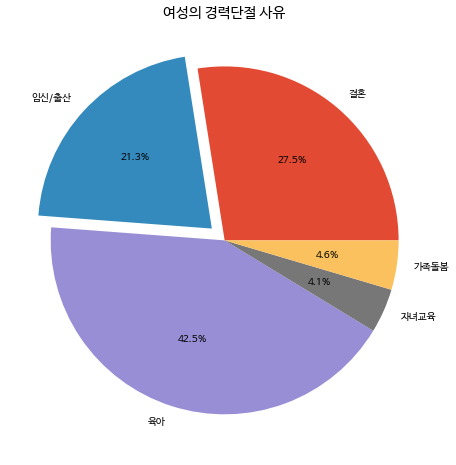

In [ ]:
import matplotlib.pyplot as plt

categories = ['결혼','임신/출산','육아','자녀교육','가족돌봄']
explode = [0, 0.10, 0, 0, 0]

plt.pie(cause[cause['연령대별']=='계']['2020'], labels=categories, autopct='%0.1f%%', explode = explode)
plt.title('여성의 경력단절 사유')

plt.savefig('cause.png')

plt.show()

In [ ]:
import pandas as pd

sex = pd.read_csv('성,연령별 경제활동인구(10,20년).csv', sep=',', encoding='cp949')
sex = sex.drop([0, 1, 2, 4, 7, 10, 13])
sex.set_index('연령계층별', inplace=True)
sex = sex.apply(pd.to_numeric)
sex

,2010,2010.1,2020,2020.1
연령계층별,,,,
15 - 19세,5.5,8.5,6.5,8.0
20 - 24세,42.8,53.5,42.0,49.3
25 - 29세,76.5,69.6,73.4,73.6
30 - 34세,91.8,54.8,89.7,67.6
35 - 39세,94.2,55.9,92.2,60.5
40 - 44세,93.9,65.9,92.3,63.4
45 - 49세,93.1,65.6,92.0,67.4
50 - 54세,90.4,61.3,89.5,67.7
55 - 59세,83.4,53.4,86.6,62.4


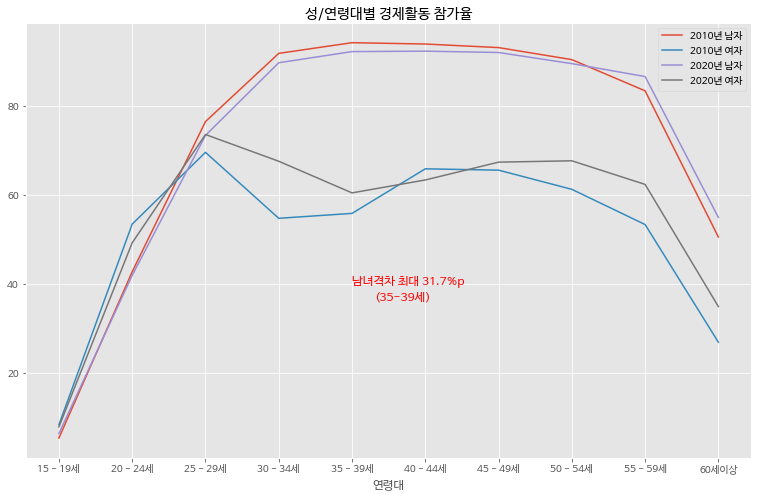

In [ ]:
sex_g = plt.plot(sex)
plt.legend(['2010년 남자','2010년 여자','2020년 남자','2020년 여자'])
plt.xlabel('연령대')
plt.title('성/연령대별 경제활동 참가율')
plt.text(x = 4, y = 40, s = '남녀격차 최대 31.7%p', color = 'r', fontsize = 12)
plt.text(x = 4.3, y = 36.5, s = '(35-39세)', color = 'r', fontsize = 12)

plt.savefig('sex.png')

In [ ]:
import pandas as pd

marriage = pd.read_csv('결혼에 대한 견해.csv', sep=',', encoding='cp949')
marriage.drop(columns = '행정구역별(1)', inplace = True)
marriage.drop(columns = '특성별(1)', inplace = True)
marriage.drop(columns = '특성별(2)', inplace = True)
marriage.set_index('항목', inplace=True)
marriage = marriage.transpose()
marriage

항목,반드시 해야 한다,하는 것이 좋다,"해도 좋고, 하지 않아도 좋다",하지 않는 것이 좋다,하지 말아야 한다,잘 모르겠다
2008,23.6,44.4,27.7,2.4,0.5,1.4
2010,21.7,43.0,30.7,2.8,0.5,1.3
2012,20.3,42.4,33.6,1.5,0.3,1.9
2014,14.9,41.9,38.9,1.6,0.4,2.2
2016,12.5,39.3,42.9,2.5,0.6,2.2
2018,11.1,37.0,46.6,2.5,0.5,2.3
2020,16.8,34.4,41.4,3.5,0.9,3.0


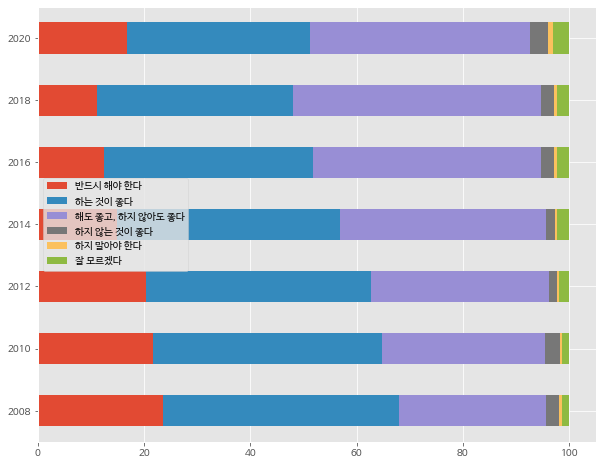

In [ ]:
marriage.plot(kind = 'barh', stacked=True, figsize=(10,8))
plt.legend(loc = 'best')

plt.savefig('view.png')
plt.show()

In [ ]:
import pandas as pd

fertility = pd.read_excel('SF_2_1_Fertility_rates.xlsx')
fertility = fertility[['Unnamed: 11', 'Unnamed: 15']]
fertility = fertility.drop([0,1,2])
fertility.columns = ['국가명','2019년']
fertility = fertility.loc[[3,47,37,32,27,25,22,20,56,55,11,39,35]]
fertility.sort_values(by=['2019년'], axis=0, inplace = True)
fertility.set_index('국가명', inplace=True)
fertility

,2019년
국가명,
Korea,0.92
Japan,1.36
EU-27 average,1.51822
Germany,1.54
Netherlands,1.574
OECD average,1.60695
United Kingdom,1.63
China,1.696
Sweden,1.7


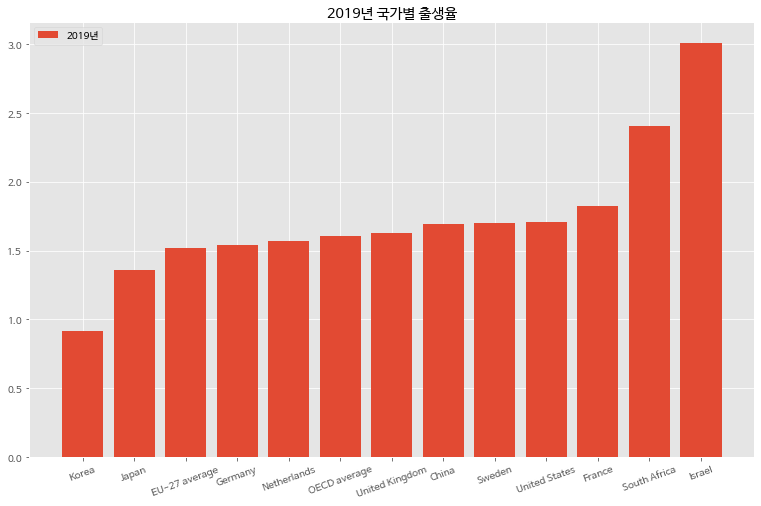

In [ ]:
import matplotlib.pyplot as plt
import numpy

label = fertility.index
plt.figure()
plt.rcParams['figure.figsize'] = (11, 8)
x = numpy.arange(len(label))

plt.bar(x, fertility['2019년'], label='2019년')
plt.xticks(x, label, rotation = 20)

plt.legend()
plt.title('2019년 국가별 출생율')

plt.savefig('fertility.png')

plt.show()

In [ ]:
import pandas as pd

outside = pd.read_excel('SF_2_4_Share_births_outside_marriage.xlsx')
outside = outside[['Unnamed: 11', 'Unnamed: 12']]
outside = outside.drop([0,1,2])
outside.columns = ['국가명','2018년']
outside = outside.loc[[46,7,12,18,25,15,33,23,43,45,27,35]]
outside.sort_values(by=['2018년'], axis=0, inplace = True)
outside.set_index('국가명', inplace=True)
outside

,2018년
국가명,
Korea,2.193933
Japan,2.300000
Israel (a),7.538644
Romania,30.900000
Germany,33.900000
United States,39.600000
OECD average,40.742992
EU average,41.303571
United Kingdom,48.200000


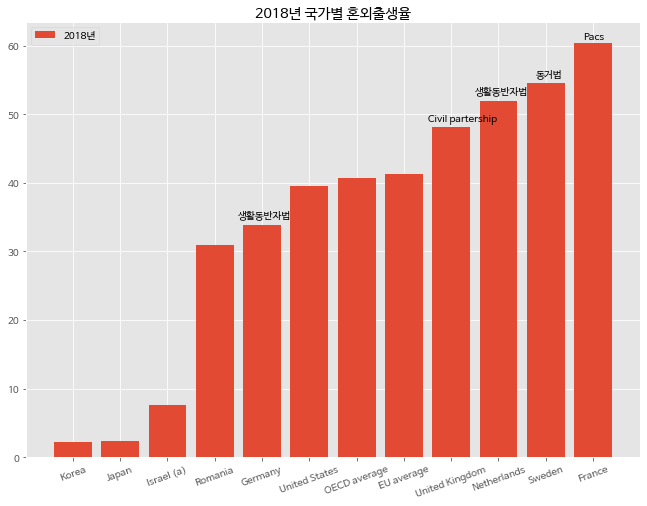

In [ ]:
import matplotlib.pyplot as plt
import numpy

label = outside.index
plt.figure()
plt.rcParams['figure.figsize'] = (11, 8)
x = numpy.arange(len(label))

plt.bar(x, outside['2018년'], label='2018년')
plt.xticks(x, label, rotation = 20)

plt.legend()
plt.title('2018년 국가별 혼외출생율')
plt.text(x = 3.5, y = 35, s ='생활동반자법')
plt.text(x = 7.5, y = 49, s ='Civil partership')
plt.text(x = 8.5, y = 53, s ='생활동반자법')
plt.text(x = 9.8, y = 55.5, s ='동거법')
plt.text(x = 10.8, y = 61, s ='Pacs')

plt.savefig('outside.png')

plt.show()

# - **김용재**

---


In [ ]:
DF = pd.read_excel('공공데이터.xlsx')
DF.apply(pd.to_numeric, errors = 'coerce')
DF.shape


(36, 5)

In [ ]:
birth = pd.read_excel('공공데이터.xlsx')
birth.apply(pd.to_numeric, errors = 'coerce')
birth.drop(columns = ['청년실업률', '공동주택 가격지수', '경제성장률'], inplace= True)


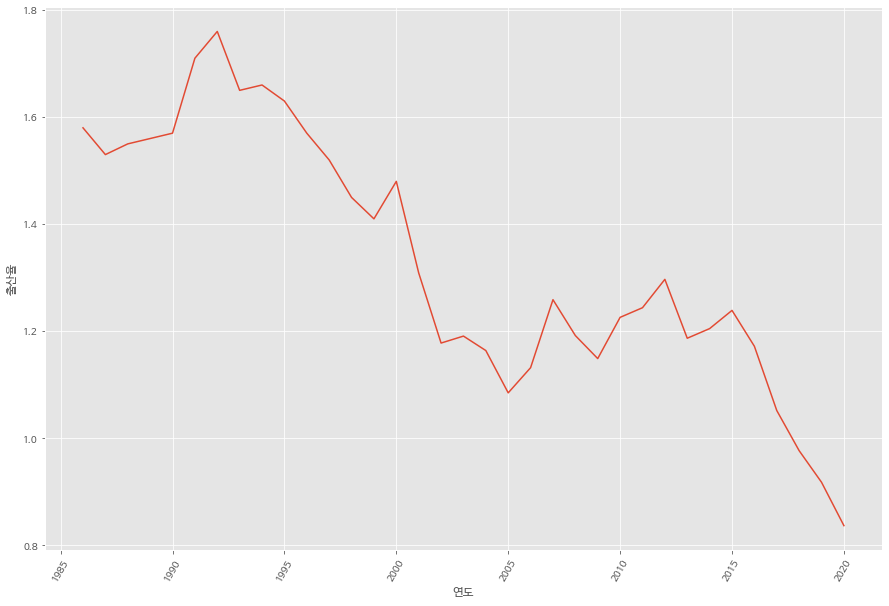

In [ ]:
#연도별 출산율

import seaborn as sns


plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
data1=sns.lineplot(data=birth, x="연도", y="출산율")


In [ ]:
econ = pd.read_excel('공공데이터.xlsx')
econ.apply(pd.to_numeric, errors = 'coerce')
econ.drop(columns = ['청년실업률', '공동주택 가격지수', '출산율'], inplace= True)


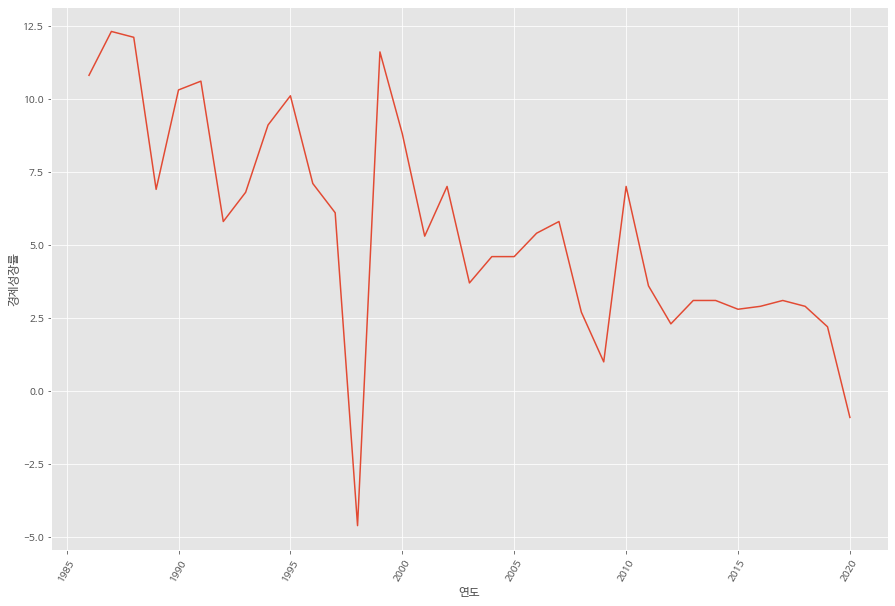

In [ ]:
#연도별 경제성장률
import seaborn as sns



plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
data2 = sns.lineplot(data=econ, x="연도", y="경제성장률")


In [ ]:
unemployment = pd.read_excel('공공데이터.xlsx')
unemployment.apply(pd.to_numeric, errors = 'coerce')
unemployment.drop(columns = ['경제성장률', '공동주택 가격지수', '출산율'], inplace= True)


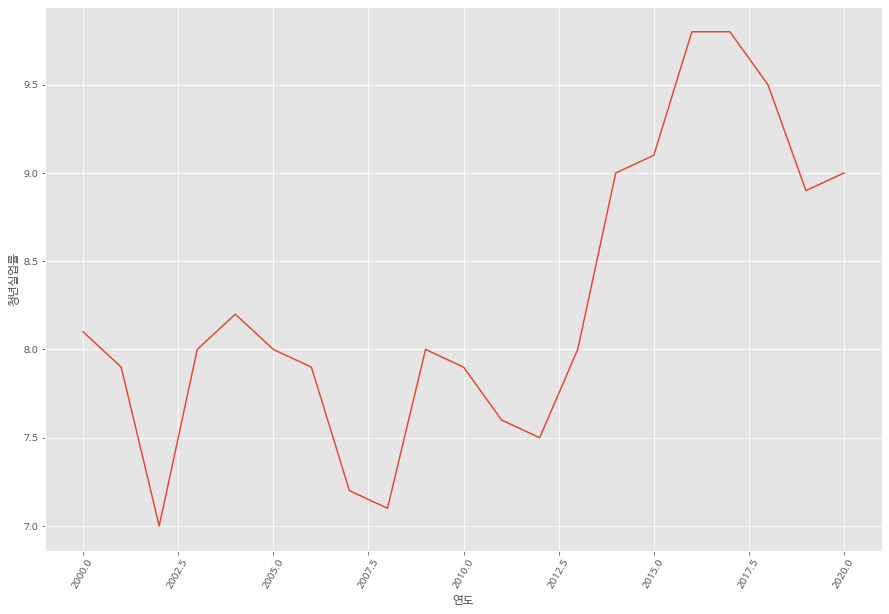

In [ ]:
#연도별 청년실업률
import seaborn as sns



plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
data3 = sns.lineplot(data=unemployment, x="연도", y="청년실업률")


In [ ]:
apartment = pd.read_excel('공공데이터.xlsx')
apartment.apply(pd.to_numeric, errors = 'coerce')
apartment.drop(columns = ['경제성장률', '청년실업률', '출산율'], inplace= True)


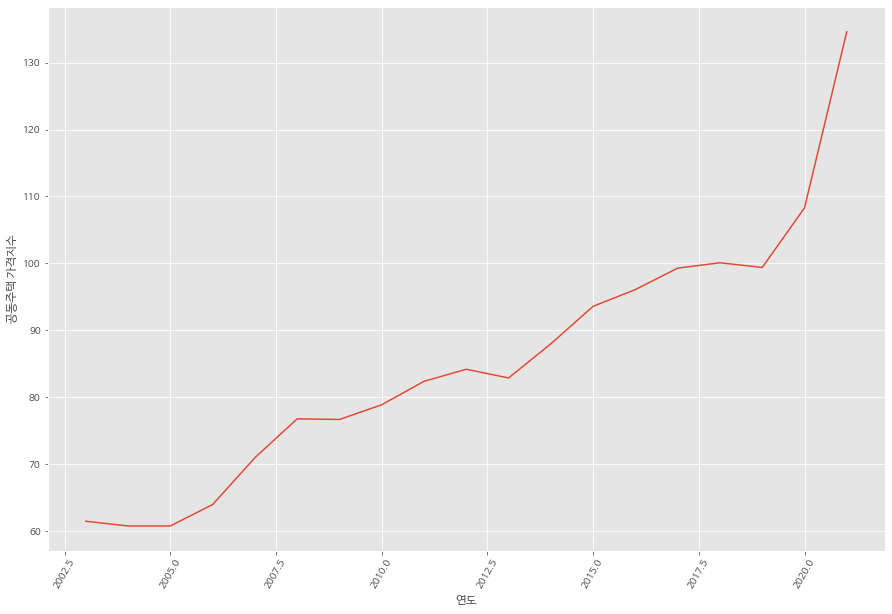

In [ ]:
#연도별 부동산 가격지수 
import seaborn as sns



plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
data4 = sns.lineplot(data=apartment, x="연도", y="공동주택 가격지수")


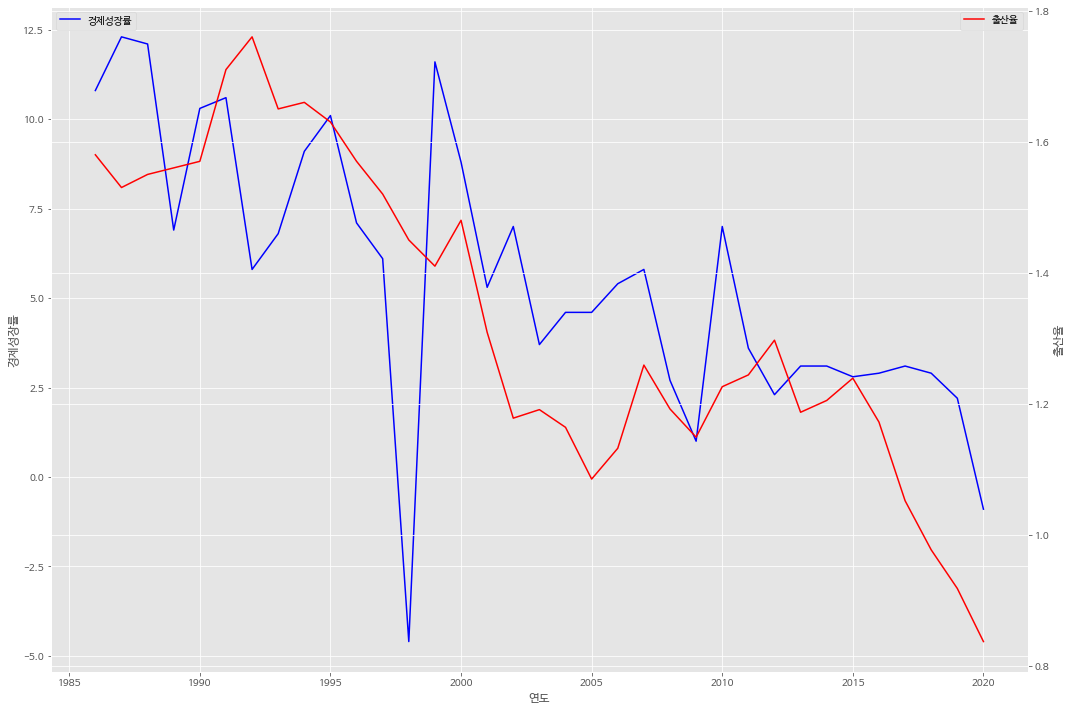

In [ ]:
#경제성장률과 출산율의 상관관계

x = DF['연도']
y1 = econ['경제성장률']
y2 = birth['출산율']

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax1.set_xlabel('연도')
ax1.set_ylabel('경제성장률')
ax2.set_ylabel('출산율')
curve1 = ax1.plot(x, y1, label='경제성장률', color='b')
curve2 = ax2.plot(x, y2, label='출산율', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.plot()
plt.show()

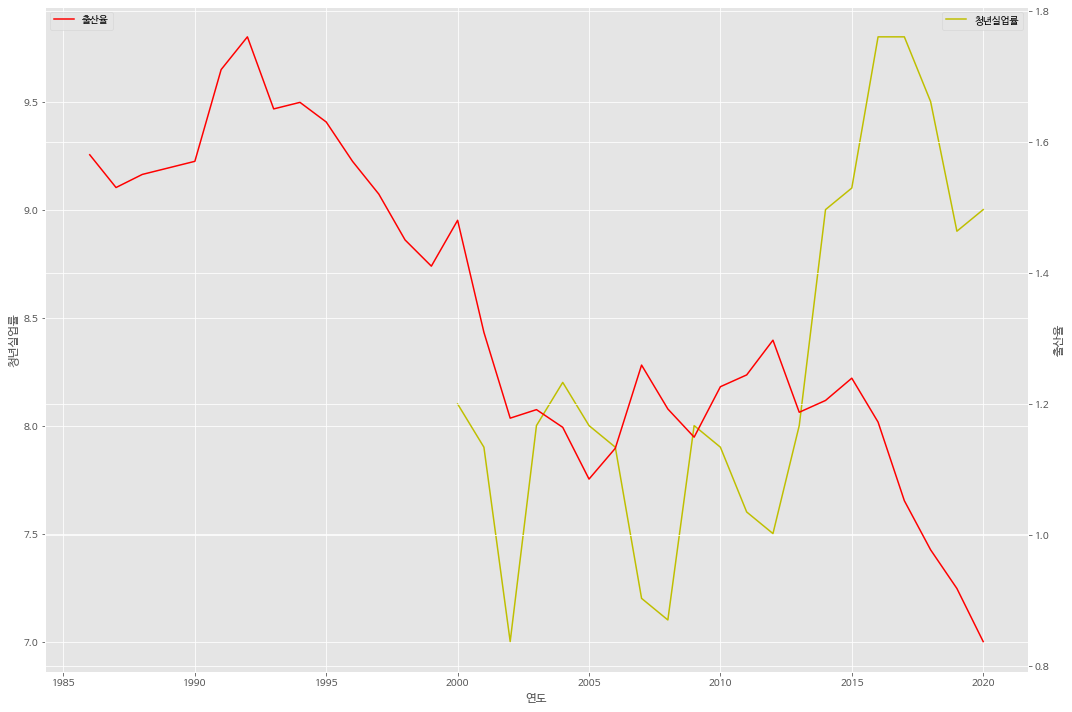

In [ ]:
#청년실업률과 출산율의 상관관계

x = DF['연도']
y1 = unemployment['청년실업률']
y2 = birth['출산율']

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax1.set_xlabel('연도')
ax1.set_ylabel('청년실업률')
ax2.set_ylabel('출산율')

curve1 = ax1.plot(x, y1, label='청년실업률', color='y')
curve2 = ax2.plot(x, y2, label='출산율', color='r')

ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.plot()
plt.show()

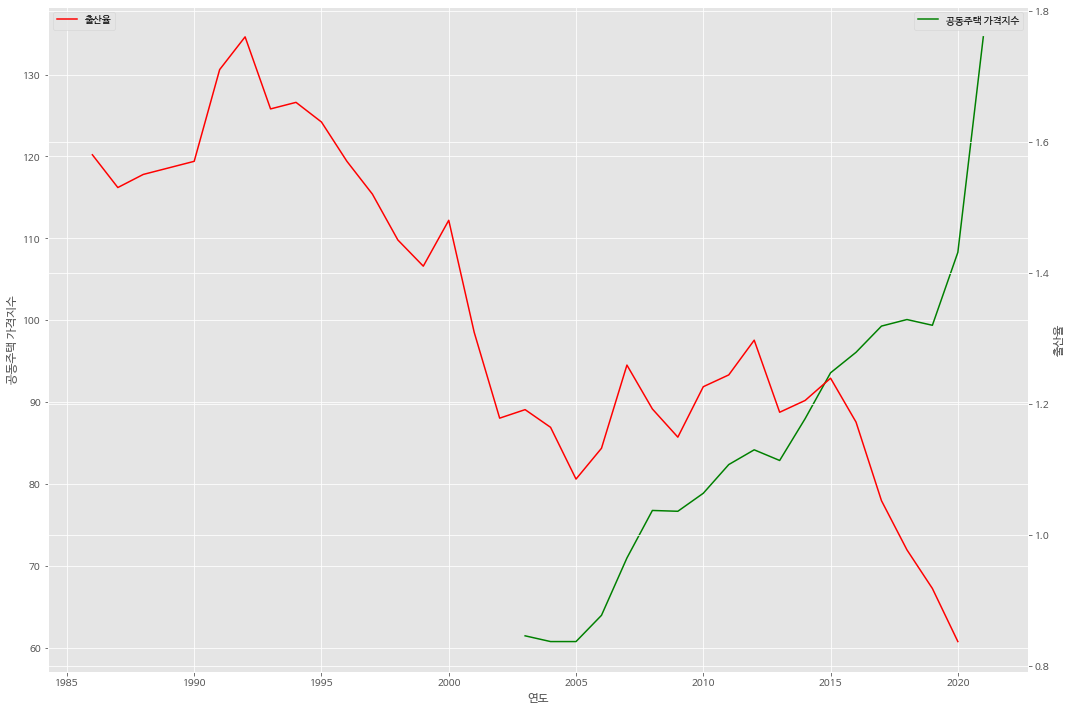

In [ ]:
#공동주택 가격지수와 출산율의 상관관계

x = DF['연도']
y1 = apartment['공동주택 가격지수']
y2 = birth['출산율']

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax1.set_xlabel('연도')
ax1.set_ylabel('공동주택 가격지수')
ax2.set_ylabel('출산율')

curve1 = ax1.plot(x, y1, label='공동주택 가격지수', color='g')
curve2 = ax2.plot(x, y2, label='출산율', color='r')


ax1.legend(loc='upper right')
ax2.legend(loc='upper left')


fig.tight_layout()
plt.plot()
plt.show()

# - **한주형**

---


Ⅰ.Data Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

 Ⅰ) Colab 파일 업로드
  *서울시 저출산 문제 통계.xls


In [ ]:
!ls -l

total 788
-rw-r--r-- 1 root root    630 Sep 14 00:26 '성,연령별 경제활동인구(10,20년).csv'
-rw-r--r-- 1 root root   6306 Sep 14 00:26 '전국 시군구,연령,연도별 출산율(17~20년).csv'
-rw-r--r-- 1 root root   1020 Sep 14 00:26 '연령,사유,연도별 경력단절여성(17~20년).csv'
-rw-r--r-- 1 root root   5848 Sep 14 00:26 '전국 월별 출생아수,혼인건수(17~21년).xlsx'
-rw-r--r-- 1 root root   1833 Sep 14 00:26 '전국 성, 30-39세 주민등록연앙인구(93~20년).csv'
-rw-r--r-- 1 root root  28777 Sep 14 00:50  age.png
-rw-r--r-- 1 root root  21724 Sep 14 00:50  birth.png
-rw-r--r-- 1 root root  26300 Sep 14 00:50  cause.png
-rw-r--r-- 1 root root  11832 Sep 14 00:26  close_down_school.xlsx
-rw-r--r-- 1 root root    492 Sep 14 00:26 '결혼에 대한 견해.csv'
-rw-r--r-- 1 root root  26900 Sep 14 00:50  fertility.png
-rw-r--r-- 1 root root  24031 Sep 14 00:26  korea_population.csv
-rw-r--r-- 1 root root  27256 Sep 14 00:50  marriage.png
-rw-r--r-- 1 root root   1568 Sep 14 00:26  middle_school.csv
-rw-r--r-- 1 root root   2690 Sep 14 00:26  middle_student.csv
-rw-r--r-- 1 root root  317

2) xls 파일 읽어오기

In [ ]:
import pandas as pd

DF = pd.read_excel('서울시 저출산 문제 통계.xls')

DF.head()

,기간,대분류,분류,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
0,기간,대분류,분류,100.0,43.9,12.5,19.6,9.7,8.3,6.0,0
1,2011,서울시,서울시,100.0,43.4,12.6,18.5,10.3,9.1,6.0,0.1
2,2011,성별,남자,100.0,44.3,12.3,20.7,9.2,7.5,5.9,0
3,2011,성별,여자,100.0,39.5,13.2,21.9,11.0,9.2,5.2,-
4,2011,연령별,10대,100.0,39.0,12.3,23.0,11.9,8.9,4.8,0


3)'기간'열(Column)삭제

In [ ]:
DF.drop(columns = '기간', inplace = True)

DF.tail()

,대분류,분류,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
49,관악구,관악구,100.0,36.2,13.3,21.7,12.9,11.2,4.6,-
50,서초구,서초구,100.0,42.2,10.9,17.5,10.3,8.6,10.4,0
51,강남구,강남구,100.0,39.8,17.2,19.7,9.6,5.0,8.6,-
52,송파구,송파구,100.0,42.7,10.6,16.9,13.1,8.5,8.1,-
53,강동구,강동구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4) 지역분류 index 삭제

In [ ]:
DF['대분류'][23:]

23    혼인상태별
24    지역대분류
25    지역대분류
26    지역대분류
27    지역대분류
28    지역대분류
29      종로구
30       중구
31      용산구
32      성동구
33      광진구
34     동대문구
35      중랑구
36      성북구
37      강북구
38      도봉구
39      노원구
40      은평구
41     서대문구
42      마포구
43      양천구
44      강서구
45      구로구
46      금천구
47     영등포구
48      동작구
49      관악구
50      서초구
51      강남구
52      송파구
53      강동구
Name: 대분류, dtype: object

In [ ]:
DF.drop(index = range(23, 53), inplace = True)

DF

,대분류,분류,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
0,대분류,분류,100.0,43.9,12.5,19.6,9.7,8.3,6.0,0
1,서울시,서울시,100.0,43.4,12.6,18.5,10.3,9.1,6.0,0.1
2,성별,남자,100.0,44.3,12.3,20.7,9.2,7.5,5.9,0
3,성별,여자,100.0,39.5,13.2,21.9,11.0,9.2,5.2,-
4,연령별,10대,100.0,39.0,12.3,23.0,11.9,8.9,4.8,0
5,연령별,20대,100.0,45.0,12.6,20.1,9.1,7.1,6.0,0
6,연령별,30대,100.0,45.3,12.6,19.5,8.5,7.4,6.7,0.1
7,연령별,40대,100.0,45.6,12.7,17.4,9.1,8.6,6.6,0
8,연령별,50대,100.0,45.8,11.9,17.3,9.7,9.4,5.9,0.1
9,연령별,60대 이상,100.0,49.9,10.8,16.2,9.7,7.8,5.6,0.1


Ⅱ.'성별'통계
 1) 성별 데이터 추출

In [ ]:
DF_G = DF[DF['대분류'] == '성별'].copy()

DF_G

,대분류,분류,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
2,성별,남자,100.0,44.3,12.3,20.7,9.2,7.5,5.9,0
3,성별,여자,100.0,39.5,13.2,21.9,11.0,9.2,5.2,-


In [ ]:
DF_G.drop(columns = '대분류',inplace = True)

DF_G

,분류,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
2,남자,100.0,44.3,12.3,20.7,9.2,7.5,5.9,0
3,여자,100.0,39.5,13.2,21.9,11.0,9.2,5.2,-


In [ ]:
DF_G.set_index('분류', inplace = True)

DF_G

,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
분류,,,,,,,,
남자,100.0,44.3,12.3,20.7,9.2,7.5,5.9,0
여자,100.0,39.5,13.2,21.9,11.0,9.2,5.2,-


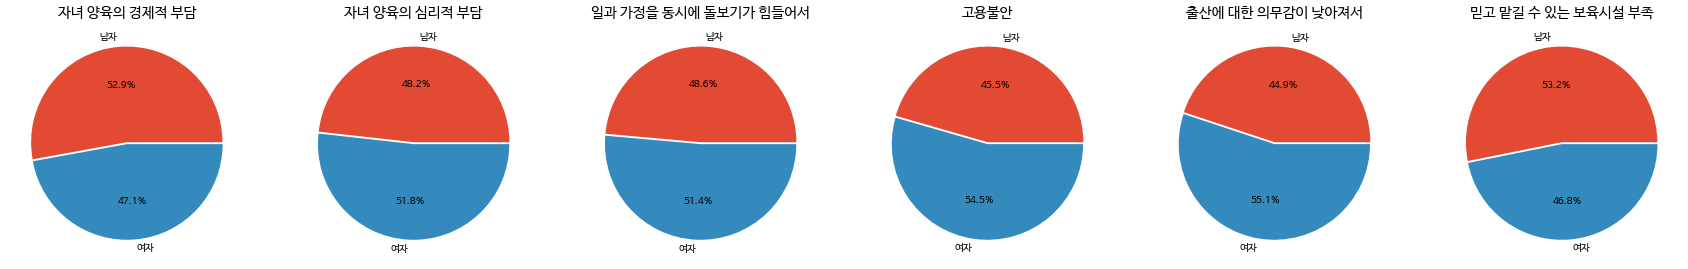

In [ ]:
figure, ax = plt.subplots(1, 6, figsize = (30, 28))

DF_G['자녀 양육의 경제적 부담'].plot.pie(explode = [0, 0.02], ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('자녀 양육의 경제적 부담')
ax[0].set_ylabel('')

DF_G['자녀 양육의 심리적 부담'].plot.pie(explode = [0, 0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('자녀 양육의 심리적 부담')
ax[1].set_ylabel('')

DF_G['일과 가정을 동시에 돌보기가 힘들어서'].plot.pie(explode = [0, 0.02], ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('일과 가정을 동시에 돌보기가 힘들어서')
ax[2].set_ylabel('')

DF_G['고용불안'].plot.pie(explode = [0, 0.02], ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('고용불안')
ax[3].set_ylabel('')

DF_G['출산에 대한 의무감이 낮아져서'].plot.pie(explode = [0, 0.02], ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('출산에 대한 의무감이 낮아져서')
ax[4].set_ylabel('')

DF_G['믿고 맡길 수 있는 보육시설 부족'].plot.pie(explode = [0, 0.02], ax = ax[5], autopct = '%1.1f%%')
ax[5].set_title('믿고 맡길 수 있는 보육시설 부족')
ax[5].set_ylabel('')

plt.show()

In [ ]:
DF_A = DF[DF['대분류'] == '연령별'].copy()
DF_A.drop(columns = '대분류', inplace = True)
DF_A.set_index('분류', inplace = True)

DF_A

,계,자녀 양육의 경제적 부담,자녀 양육의 심리적 부담,일과 가정을 동시에 돌보기가 힘들어서,고용불안,출산에 대한 의무감이 낮아져서,믿고 맡길 수 있는 보육시설 부족,기타
분류,,,,,,,,
10대,100.0,39.0,12.3,23.0,11.9,8.9,4.8,0
20대,100.0,45.0,12.6,20.1,9.1,7.1,6.0,0
30대,100.0,45.3,12.6,19.5,8.5,7.4,6.7,0.1
40대,100.0,45.6,12.7,17.4,9.1,8.6,6.6,0
50대,100.0,45.8,11.9,17.3,9.7,9.4,5.9,0.1
60대 이상,100.0,49.9,10.8,16.2,9.7,7.8,5.6,0.1


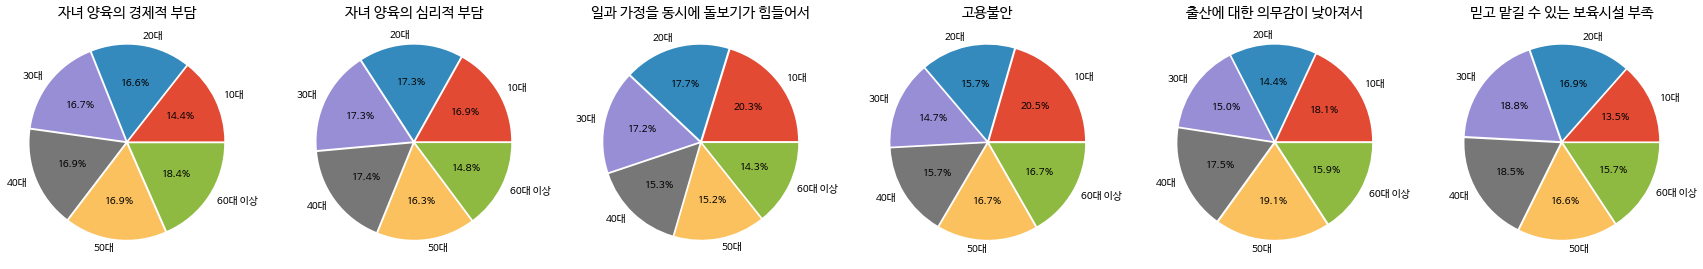

In [ ]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1, 6, figsize = (30,28))

explode_set = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

DF_A['자녀 양육의 경제적 부담'].plot.pie(explode = explode_set, ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('자녀 양육의 경제적 부담')
ax[0].set_ylabel('')


DF_A['자녀 양육의 심리적 부담'].plot.pie(explode = explode_set, ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('자녀 양육의 심리적 부담')
ax[1].set_ylabel('')


DF_A['일과 가정을 동시에 돌보기가 힘들어서'].plot.pie(explode = explode_set, ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('일과 가정을 동시에 돌보기가 힘들어서')
ax[2].set_ylabel('')

DF_A['고용불안'].plot.pie(explode = explode_set, ax = ax[3], autopct = '%1.1f%%')
ax[3].set_title('고용불안')
ax[3].set_ylabel('')

DF_A['출산에 대한 의무감이 낮아져서'].plot.pie(explode = explode_set, ax = ax[4], autopct = '%1.1f%%')
ax[4].set_title('출산에 대한 의무감이 낮아져서')
ax[4].set_ylabel('')

DF_A['믿고 맡길 수 있는 보육시설 부족'].plot.pie(explode = explode_set, ax = ax[5], autopct = '%1.1f%%')
ax[5].set_title('믿고 맡길 수 있는 보육시설 부족')
ax[5].set_ylabel('')

plt.show()